# Regression Machine Learning Case Study Project
## 1.Problem Definition
For this project we will investigate the Boston House Price dataset. Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are defined as follows (taken from the UCI Machine Learning Repository):
1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 millions)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centers
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per $10,000
11. PTRATIO: pupil-teacher ratio by town
12. B: 1000(Bk − 0.63)2 where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population
14. MEDV: Median value of owner-occupied homes in $1000s
We can see that the input attributes have a mixture of units.

---

Trong dự án này, chúng ta sẽ nghiên cứu bộ dữ liệu Giá nhà Boston. Mỗi bản ghi trong cơ sở dữ liệu mô tả một vùng ngoại ô hoặc thị trấn của Boston. Dữ liệu được lấy từ Khu vực Thống kê Đô thị Chuẩn Boston (SMSA) năm 1970. Các thuộc tính được định nghĩa như sau (trích từ Kho lưu trữ Học máy UCI):
1. CRIM: tỷ lệ tội phạm bình quân đầu người theo thị trấn
2. ZN: tỷ lệ đất ở được phân vùng cho các lô đất trên 25.000 feet vuông (khoảng 2.400 mét vuông).
3. INDUS: tỷ lệ mẫu Anh đất kinh doanh phi bán lẻ trên mỗi thị trấn
4. CHAS: Biến giả sông Charles (= 1 nếu ranh giới khu vực là sông; 0 nếu không)
5. NOX: nồng độ oxit nitric (phần trên 10 triệu)
6. RM: số phòng trung bình trên mỗi căn hộ
7. AGE: tỷ lệ nhà ở do chủ sở hữu xây dựng trước năm 1940
8. DIS: khoảng cách có trọng số đến năm trung tâm việc làm ở Boston
9. RAD: chỉ số khả năng tiếp cận đường cao tốc xuyên tâm
10. TAX: thuế suất tài sản toàn phần trên 10.000 đô la
11. PTRATIO: tỷ lệ học sinh/giáo viên theo thị trấn
12. B: 1000 (Bk - 0,63)2 trong đó Bk là tỷ lệ người da đen theo thị trấn
13. LSTAT: % địa vị thấp hơn của dân số
14. MEDV: Giá trị trung bình của nhà ở do chủ sở hữu xây dựng theo đơn vị nghìn đô la
Chúng ta có thể thấy rằng đầu vào các thuộc tính có sự kết hợp của các đơn vị.

## 2. Load the Dataset
### **Import libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import arange
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix as sm

from sklearn.preprocessing import StandardScaler

# Model selection
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import KFold as KF
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import GridSearchCV

# Models
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Ensemble
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    ExtraTreesRegressor,
    AdaBoostRegressor
)

# Pipeline & metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

### **Load data**

In [2]:
# Load dataset
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
         'B', 'LSTAT', 'MEDV']
df = pd.read_csv('./data/housing.csv', names=names)

## 3. Analyze data (Phân tích dữ liệu)
### **Descriptive Statistics**

In [3]:
#shape
print(df.shape)

(506, 14)


In [4]:
# type
print(df.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [5]:
# head
print(df.head(20))

       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6   0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7   0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8   0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9   0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   
10  0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311.0   
11  0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311.0   
12  0.09378  12.5   7.87 

In [6]:
#description
# Dataset description
pd.set_option('display.precision', 1)
print(df.describe())

          CRIM     ZN  INDUS     CHAS    NOX     RM    AGE    DIS    RAD  \
count  5.1e+02  506.0  506.0  5.1e+02  506.0  506.0  506.0  506.0  506.0   
mean   3.6e+00   11.4   11.1  6.9e-02    0.6    6.3   68.6    3.8    9.5   
std    8.6e+00   23.3    6.9  2.5e-01    0.1    0.7   28.1    2.1    8.7   
min    6.3e-03    0.0    0.5  0.0e+00    0.4    3.6    2.9    1.1    1.0   
25%    8.2e-02    0.0    5.2  0.0e+00    0.4    5.9   45.0    2.1    4.0   
50%    2.6e-01    0.0    9.7  0.0e+00    0.5    6.2   77.5    3.2    5.0   
75%    3.7e+00   12.5   18.1  0.0e+00    0.6    6.6   94.1    5.2   24.0   
max    8.9e+01  100.0   27.7  1.0e+00    0.9    8.8  100.0   12.1   24.0   

         TAX  PTRATIO      B  LSTAT   MEDV  
count  506.0    506.0  506.0  506.0  506.0  
mean   408.2     18.5  356.7   12.7   22.5  
std    168.5      2.2   91.3    7.1    9.2  
min    187.0     12.6    0.3    1.7    5.0  
25%    279.0     17.4  375.4    6.9   17.0  
50%    330.0     19.1  391.4   11.4   21.2  


### *Note*
Mặc định (`include=None`): chỉ áp dụng cho cột dạng số (`int`, `float`)

| Thông số | Ý nghĩa | Ảnh hưởng |
|----------|---------|-----------|
| **count** | Số lượng giá trị hợp lệ (không tính NaN). | Ít giá trị --> thống kê kém tin cậy. |
| **mean**  | Giá trị trung bình của cột. | Dễ bị kéo lệch bởi outlier. |
| **std**   | Độ lệch chuẩn (mức độ phân tán so với mean). | Nhỏ --> dữ liệu đồng đều; Lớn --> dữ liệu phân tán mạnh. |
| **min**   | Giá trị nhỏ nhất. | Thấp bất thường có thể là outlier hoặc lỗi nhập liệu. |
| **25% (Q1)** | Phân vị 25% (25% dữ liệu nhỏ hơn hoặc bằng). | Cho thấy ngưỡng dưới của dữ liệu. |
| **50% (median, Q2)** | Giá trị trung vị. | Ổn định hơn mean, ít bị ảnh hưởng bởi outlier. |
| **75% (Q3)** | Phân vị 75% (75% dữ liệu nhỏ hơn hoặc bằng). | Cho thấy ngưỡng trên của dữ liệu. |
| **max**   | Giá trị lớn nhất. | Cao bất thường có thể là outlier. |

---

Dạng chuỗi (`include=[object]`): chỉ áp dụng cho cột dạng chuỗi

| Thông số | Ý nghĩa | Ảnh hưởng |
|----------|---------|-----------|
| **count**  | Số giá trị hợp lệ (không tính NaN). | Ít giá trị --> kết quả thống kê không tin cậy. |
| **unique** | Số lượng giá trị khác nhau (distinct). | Cho biết độ đa dạng của dữ liệu. |
| **top**    | Giá trị xuất hiện nhiều nhất (mode). | Phản ánh xu hướng phổ biến. |
| **freq**   | Tần suất xuất hiện của giá trị phổ biến nhất. | Giá trị cao --> dữ liệu mất cân bằng. |


### *Correlation matrix (Ma trận phân tán)*


Now, let’s now take a look at the correlation between all of the numeric attributes.

---
Bây giờ, chúng ta hãy xem xét mối tương quan giữa tất cả các thuộc tính số.

In [7]:
# correlation
pd.set_option('display.precision', 2)
# Tính ma trận tương quan
corr = df.corr(method="pearson")
print(corr)

         CRIM    ZN  INDUS      CHAS   NOX    RM   AGE   DIS       RAD   TAX  \
CRIM     1.00 -0.20   0.41 -5.59e-02  0.42 -0.22  0.35 -0.38  6.26e-01  0.58   
ZN      -0.20  1.00  -0.53 -4.27e-02 -0.52  0.31 -0.57  0.66 -3.12e-01 -0.31   
INDUS    0.41 -0.53   1.00  6.29e-02  0.76 -0.39  0.64 -0.71  5.95e-01  0.72   
CHAS    -0.06 -0.04   0.06  1.00e+00  0.09  0.09  0.09 -0.10 -7.37e-03 -0.04   
NOX      0.42 -0.52   0.76  9.12e-02  1.00 -0.30  0.73 -0.77  6.11e-01  0.67   
RM      -0.22  0.31  -0.39  9.13e-02 -0.30  1.00 -0.24  0.21 -2.10e-01 -0.29   
AGE      0.35 -0.57   0.64  8.65e-02  0.73 -0.24  1.00 -0.75  4.56e-01  0.51   
DIS     -0.38  0.66  -0.71 -9.92e-02 -0.77  0.21 -0.75  1.00 -4.95e-01 -0.53   
RAD      0.63 -0.31   0.60 -7.37e-03  0.61 -0.21  0.46 -0.49  1.00e+00  0.91   
TAX      0.58 -0.31   0.72 -3.56e-02  0.67 -0.29  0.51 -0.53  9.10e-01  1.00   
PTRATIO  0.29 -0.39   0.38 -1.22e-01  0.19 -0.36  0.26 -0.23  4.65e-01  0.46   
B       -0.39  0.18  -0.36  4.88e-02 -0.

## 4. Data Visualization (Trực quan hóa dữ liệu)
### **Unimodal Data Visualizations (Hình ảnh hóa dữ liệu)**

**Histograms (Biểu đồ cột tần suất)**

Let’s look at visualizations of individual attributes. It is often useful to look at your data using multiple different visualizations in order to spark ideas. Let’s look at histograms of each attribute to get a sense of the data distributions.

---
Hãy cùng xem xét hình ảnh trực quan của từng thuộc tính. Việc xem xét dữ liệu của bạn bằng nhiều hình ảnh trực quan khác nhau thường rất hữu ích để khơi gợi ý tưởng. Hãy cùng xem biểu đồ tần suất của từng thuộc tính để hiểu rõ hơn về phân phối dữ liệu.

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

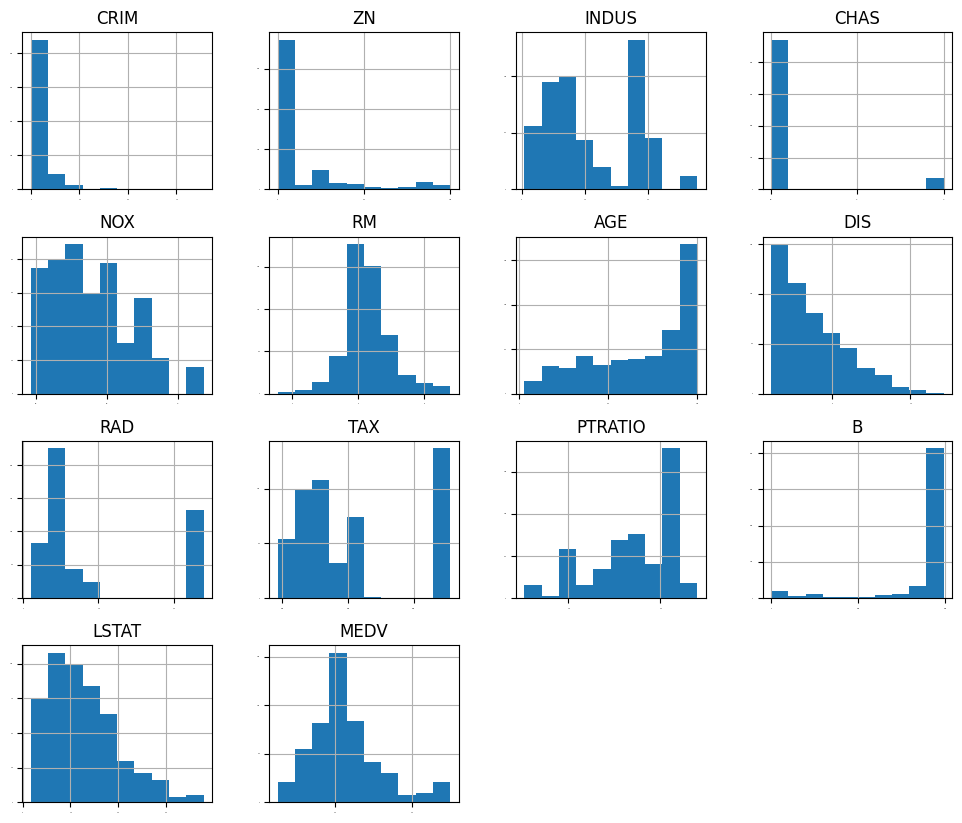

In [8]:
# histograms
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12, 10))

**Density Plot (Biểu đồ mật độ)**

Let’s look at the same distributions using density plots that smooth them out a bit.

---
Chúng ta hãy xem xét các phân phối tương tự bằng cách sử dụng biểu đồ mật độ để làm mịn chúng hơn một chút.

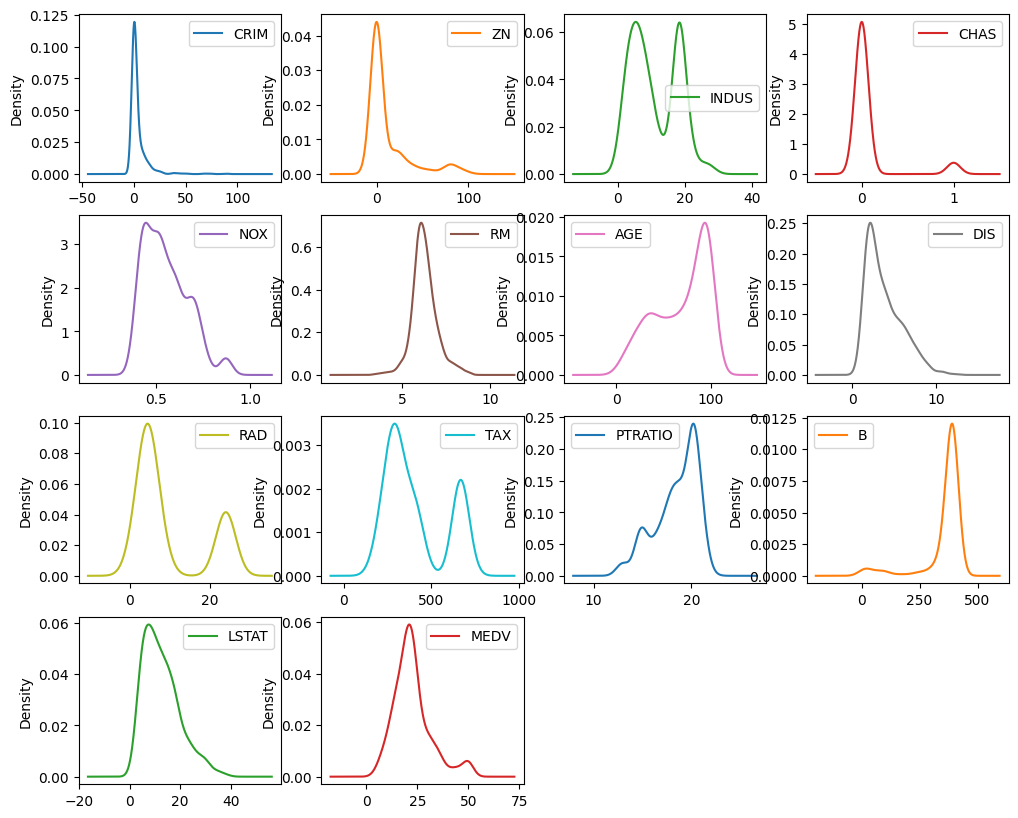

In [9]:
# density
df.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(12, 10))
plt.show()

Based on the above results, this perhaps adds more evidence suspicion about possible exponential and bimodal distributions. It also looks like NOX, RM and LSTAT may be skewed Gaussian distributions, which might be helpful later with transforms.

---
Dựa vào kết quả trên, điều này có lẽ củng cố thêm bằng chứng cho nghi ngờ về khả năng phân phối mũ và phân phối hai đỉnh. Có vẻ như NOX, RM và LSTAT có thể là phân phối chuẩn Gauss, điều này có thể hữu ích sau này với các phép biến đổi.

**box and whisker plots (Biểu đồ hộp)**

This helps point out the skew in many distributions so much so that data looks like outliers

---
Điều này giúp chỉ ra độ lệch trong nhiều phân phối đến mức dữ liệu trông giống như các giá trị ngoại lệ

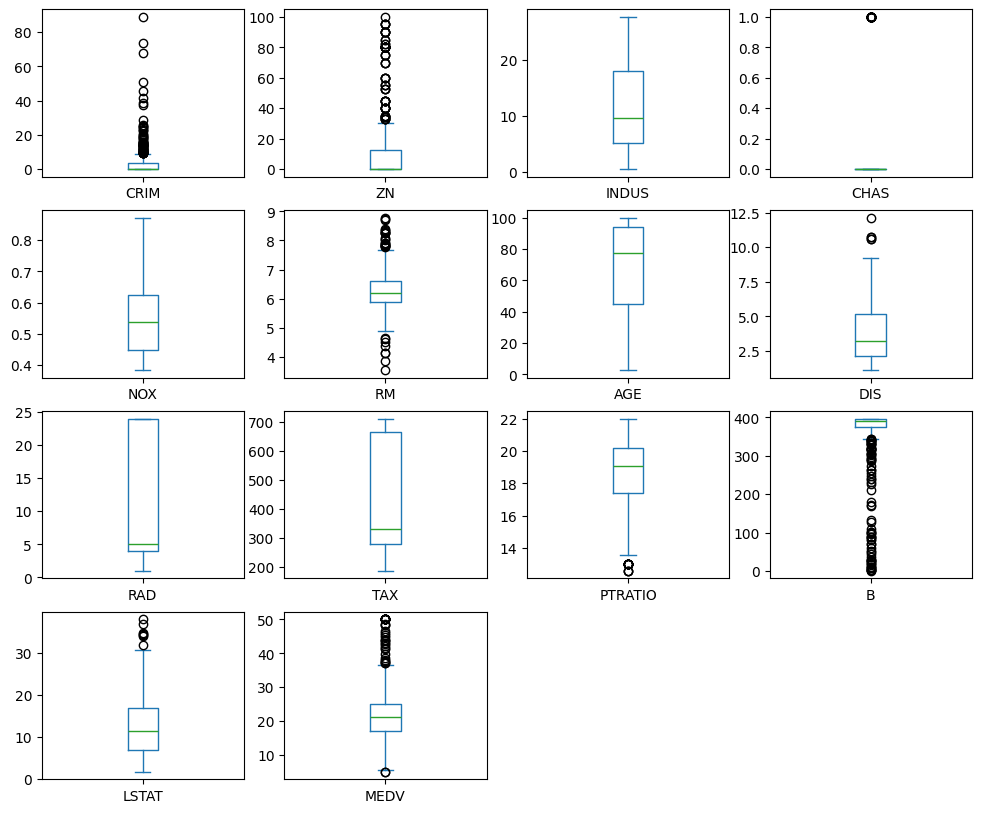

In [10]:
# box and whisker plots
df.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False, figsize=(12, 10))
plt.show()

### **Multimodal Data Visualization (Hình ảnh hóa dữ liệu đa phương thức)**

**Scatter plot matrix (Ma tranj biểu đồ phân tán)**

Let’s look at some visualizations of the interactions between variables. The best place to start is a scatter plot matrix.

We can see that some of the higher correlated attributes do show good structure in their relationship. Not linear, but nice predictable curved relationships.

---
Hãy cùng xem một số trực quan hóa về sự tương tác giữa các biến. Nơi tốt nhất để bắt đầu là ma trận scatter plot (Biểu đồ phân tán).

Chúng ta có thể thấy rằng một số thuộc tính có hệ số tương quan cao thể hiện cấu trúc khá rõ ràng trong mối quan hệ của chúng. Không phải tuyến tính, nhưng là những mối quan hệ cong khá dễ dự đoán.

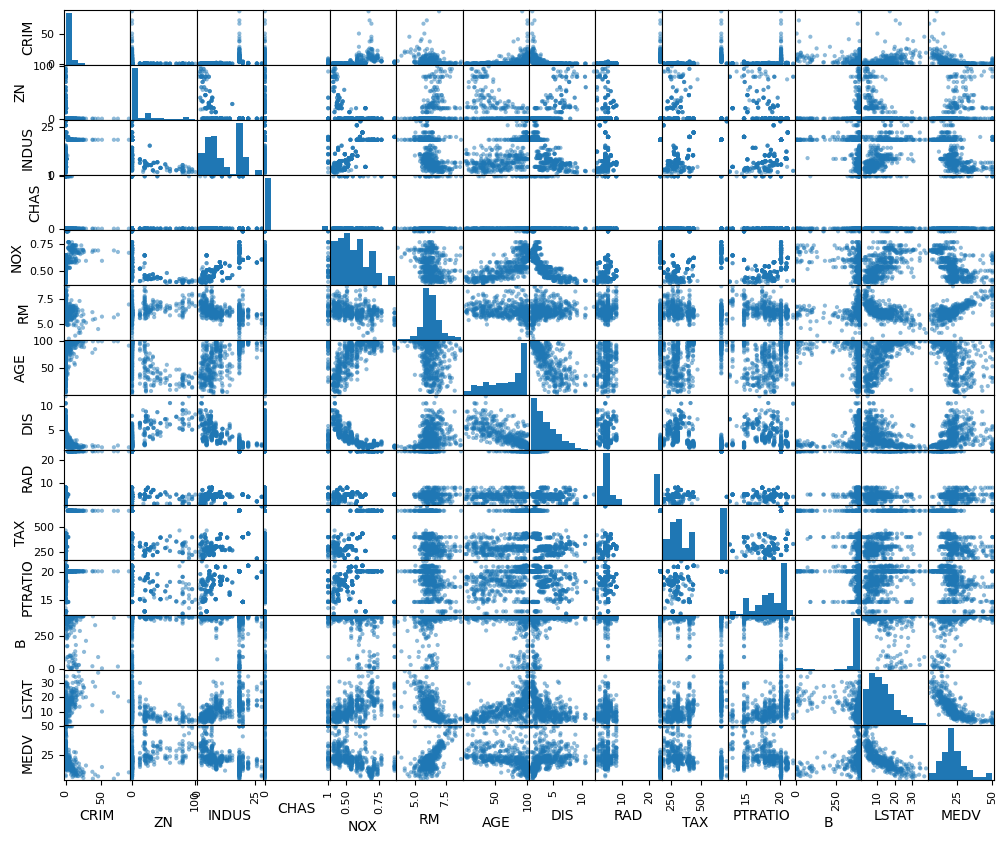

In [11]:
# scatter plot matrix
sm(df, figsize=(12, 10))
plt.show()

**Correlation matrix (Ma trận biểu đồ nhiệt tương quan)**

The dark red color shows positive correlation whereas the dark blue color shows negative correlation. We can also see some dark red and dark blue that suggest candidates for removal to better improve accuracy of models later on.

---
Màu đỏ đậm thể hiện mối tương quan dương trong khi màu xanh đậm thể hiện mối tương quan âm. Chúng ta cũng có thể thấy một số vùng đỏ đậm và xanh đậm, gợi ý những biến có thể được loại bỏ nhằm cải thiện độ chính xác của các mô hình sau này.

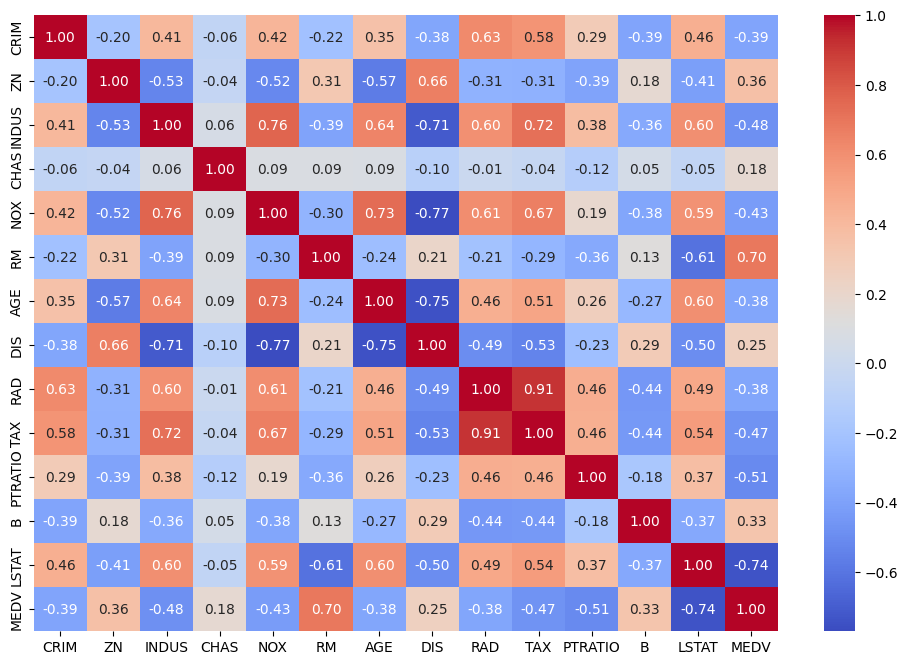

In [12]:
# Correlation Heatmap (Biểu đồ nhiệt tương quan --> Hiển thị mức độ tương quan giữa các biến)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.show()

### **Summary of Ideas (Tóm tắt ý tưởng)**

- There is a lot of structure in this dataset. We need to think about transforms that we could use later to better expose the structure which in turn may improve modeling accuracy. So far it would be worth trying:

    + Feature selection and removing the most correlated attributes.

    + Normalizing the dataset to reduce the effect of differing scales.

    + Standardizing the dataset to reduce the effects of differing distributions.

- With lots of additional time I would also explore `the possibility of binning (discretization)` of the data. This can often improve accuracy for decision tree algorithms.

---
- Bộ dữ liệu này có rất nhiều cấu trúc. Chúng ta cần suy nghĩ về các phép biến đổi có thể áp dụng sau này để làm lộ rõ cấu trúc hơn, từ đó có thể cải thiện độ chính xác của mô hình. Cho đến hiện tại, những hướng thử nghiệm đáng chú ý gồm có:

    + Chọn lọc đặc trưng và loại bỏ những thuộc tính có tương quan cao nhất.

    + Chuẩn hóa dữ liệu nhằm giảm ảnh hưởng của sự khác biệt về thang đo.

    + Tiêu chuẩn hóa dữ liệu nhằm giảm ảnh hưởng của sự khác biệt về phân phối.
    
- Nếu có thêm nhiều thời gian, tôi cũng sẽ xem xét khả năng `rời rạc hóa (binning/discretization)` dữ liệu. Kỹ thuật này thường có thể cải thiện độ chính xác cho các thuật toán cây quyết định.

## 5. Validation Dataset (Bộ dữ liệu xác thực)

It is a good idea to use a validation hold-out set. This is a sample of the data that we hold back from our analysis and modeling. We use it right at the end of our project to confirm the accuracy of our final model. It is a smoke test that we can use to see if we messed up and to give us confidence on our estimates of accuracy on unseen data. We will use 80% of the dataset for modeling and hold back 20% for validation.

---
Sử dụng một tập dữ liệu giữ lại để kiểm định (validation hold-out set) là một ý tưởng hay. Đây là một mẫu dữ liệu được tách riêng, không dùng trong quá trình phân tích và xây dựng mô hình. Chúng ta chỉ sử dụng nó ở giai đoạn cuối của dự án để xác nhận độ chính xác của mô hình cuối cùng. Nó đóng vai trò như một phép thử nhanh (smoke test) nhằm kiểm tra xem chúng ta có mắc sai sót gì không, đồng thời giúp tăng độ tin cậy trong việc ước lượng độ chính xác trên dữ liệu chưa từng thấy. Trong trường hợp này, chúng ta sẽ sử dụng 80% tập dữ liệu cho việc xây dựng mô hình và giữ lại 20% để kiểm định.

In [13]:
# Split-out validation dataset
array = df.values  # Chuyển DataFrame thành mảng NumPy
X = array[:,0:13]   # Các thuộc tính đầu vào (Lấy tất cả các hàng (:) và các cột từ 0 đến 12)
Y = array[:,13]     # Thuộc tính đầu ra (lấy toàn bộ hàng ở cột 13)
validation_size = 0.20  # Kích thước tập xác thực (20% dữ liệu)
seed = 7                # Giá trị random_state để tái lập kết quả
X_train, X_validation, Y_train, Y_validation = tts(X, Y, test_size=validation_size, random_state=seed)

## 5. Evaluate Algorithms: Baseline (Đánh giá thuật toán: Mốc so sánh cơ bản (Baseline))

In [14]:
# Test options and evaluation metric
num_folds = 10  # Số lượng gập (folds) trong k-fold cross-validation
seed = 7
scoring = 'neg_mean_squared_error'

*Create the List Algorithms to Evaluate*

In [15]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))

In [16]:
# evaluate each model in turn
results = []   # danh sách để lưu kết quả đánh giá (MSE) của từng model qua cross-validation
names = []     # danh sách để lưu tên của các model

# duyệt qua từng cặp (tên, mô hình) trong danh sách models
for name, model in models:
    # tạo đối tượng KFold cross validation
    # n_splits=num_folds --> chia dữ liệu thành num_folds phần
    # random_state=seed --> đảm bảo kết quả có thể tái lập
    # shuffle=True --> xáo trộn dữ liệu trước khi chia fold
    kfold = KF(n_splits=num_folds, random_state=seed, shuffle=True)
    
    # chạy cross_val_score cho model với tập train (X_train, Y_train)
    # cv=kfold --> dùng KFold làm phương pháp chia fold
    # scoring=scoring --> chỉ định thước đo đánh giá (vd: 'neg_mean_squared_error')
    cv_results = cvs(model, X_train, Y_train, cv=kfold, scoring=scoring)
    
    # lưu kết quả (mảng các điểm số của từng fold) vào results
    results.append(cv_results)
    # lưu tên model vào danh sách names
    names.append(name)
    
    # in ra kết quả trung bình và độ lệch chuẩn của điểm số cross-validation cho từng model
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: -22.006009 (12.188886)
KNN: -39.808936 (16.507968)
CART: -27.114637 (19.704886)
SVR: -67.824705 (32.801530)
LASSO: -27.105803 (13.165915)
EN: -27.923014 (13.156405)


### *Note*
- Qua kết quả trên ta có các định nghĩa:

    + `Giá trị trung bình (mean)` --> mức sai số dự đoán trung bình trên các fold (MSE, càng gần 0 càng tốt).

    + `Giá trị trong ngoặc (std)` --> độ lệch chuẩn, thể hiện độ ổn định của mô hình qua các fold (càng nhỏ càng ổn định).
    
    + `Dấu âm (-)` xuất hiện vì trong scoring bạn dùng neg_mean_squared_error (chuẩn của sklearn). Thực chất, ta quan tâm đến trị tuyệt đối (càng nhỏ càng tốt).

C:\Users\ratos\AppData\Local\Temp\ipykernel_19144\794958264.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, vert=True, patch_artist=True, labels=names)


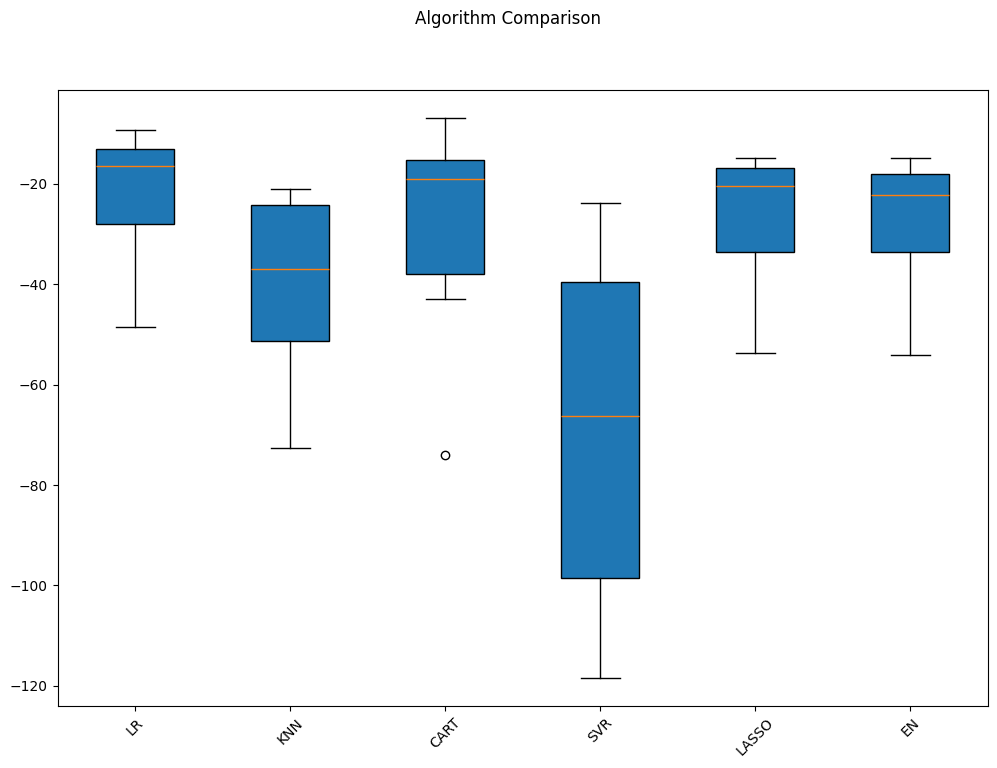

In [17]:
# Compare Algorithms
fig = plt.figure(figsize=(12, 8))  
# Tạo một figure (kích thước 12x8 inch) để chứa biểu đồ

fig.suptitle('Algorithm Comparison')  
# Đặt tiêu đề chính cho figure là "Algorithm Comparison"

ax = fig.add_subplot(111)  
# Thêm một subplot (1 hàng, 1 cột, vị trí 1)
# 111 có nghĩa: grid 1x1 và lấy ô đầu tiên (chỉ có 1 ô)

plt.boxplot(results, vert=True, patch_artist=True, labels=names)  
# Vẽ boxplot để so sánh phân phối kết quả cross-validation của từng mô hình
# results: danh sách kết quả điểm số của các mô hình (list các mảng cv_results)
# vert=True: vẽ hộp theo chiều dọc
# patch_artist=True: làm đầy màu sắc cho boxplot
# labels=names: gán nhãn (tên mô hình) cho từng boxplot

ax.set_xticklabels(names, rotation=45)  
# Xoay nhãn trục X (tên mô hình) 45 độ để dễ đọc

plt.show()  

## 7. Evaluate Algorithms: Standardization (Đánh giá các thuật toán: Chuẩn hóa dữ liệu)

We suspect that the differing scales of the raw data may be negatively impacting the skill of some of the algorithms. Let’s evaluate the same algorithms with a `standardized` copy of the dataset. This is where the data is transformed such that each attribute has a mean value of zero and a standard deviation of 1. 

We also need to avoid data leakage when we transform the data. A good way to avoid leakage is to use `pipelines` that standardize the data and build the model for each fold in the cross validation test harness. That way we can get a fair estimation of how each model with standardized data might perform on unseen data.

---
Chúng ta nghi ngờ rằng sự khác biệt về thang đo (scale) trong dữ liệu gốc có thể đang ảnh hưởng tiêu cực đến hiệu suất của một số thuật toán. Vì vậy, hãy đánh giá lại các thuật toán với một bản sao đã được chuẩn hóa của tập dữ liệu. `Chuẩn hóa (standardization)` là quá trình biến đổi dữ liệu sao cho mỗi thuộc tính có giá trị trung bình bằng 0 và độ lệch chuẩn bằng 1.

Chúng ta cũng cần tránh hiện tượng rò rỉ dữ liệu (data leakage) khi thực hiện biến đổi này. Một cách tốt để tránh rò rỉ là sử dụng `pipeline`, trong đó vừa chuẩn hóa dữ liệu vừa xây dựng mô hình cho từng fold trong quy trình cross-validation. Như vậy, chúng ta có thể có được một ước lượng công bằng về việc mỗi mô hình với dữ liệu chuẩn hóa có thể hoạt động như thế nào trên dữ liệu chưa từng thấy.

### *Note*
### *Trước khi qua code thì ta hãy tìm hiểu về chuẩn hóa dữ liệu là gì? và chức năng của nó trong việc xử lý dữ liệu*

### `Chuẩn hóa dữ liệu (Standardization)`

### **Định nghĩa**
**Chuẩn hóa dữ liệu (Standardization)** là quá trình biến đổi dữ liệu sao cho **mỗi đặc trưng (feature)** có:
- Giá trị trung bình (mean) = 0  
- Độ lệch chuẩn (standard deviation) = 1  

Mục đích: đưa các đặc trưng về cùng một thang đo, giúp các thuật toán **nhạy cảm với scale** như **KNN, SVM, Linear Regression, Logistic Regression** hoạt động hiệu quả hơn.  

---

### **Công thức**

Cho một giá trị `x` trong feature:

$$
x' = \frac{x - \mu}{\sigma}
$$

Trong đó:
- `x`: giá trị gốc  
- `μ`: giá trị trung bình của feature  
- `σ`: độ lệch chuẩn của feature  
- `x'`: giá trị sau khi chuẩn hóa  

Sau chuẩn hóa:  

$$
\text{mean} = 0, \quad \text{std} = 1
$$


---

### Tránh Data Leakage với Pipeline
- **Data leakage** xảy ra khi scaler được fit trên toàn bộ dataset (bao gồm cả validation/test).  
- **Cách xử lý**: dùng **Pipeline** trong sklearn, đảm bảo rằng:
  1. Scaler chỉ fit trên **train fold** trong cross-validation.  
  2. Validation/test chỉ được **transform**, không ảnh hưởng đến việc tính toán mean và std.  

In [18]:
# Standardize the dataset
pipelines = []  

# Tạo một pipeline cho từng mô hình:
# Pipeline gồm 2 bước: 
# 1) Chuẩn hóa dữ liệu bằng StandardScaler (mean=0, std=1) 
# 2) Huấn luyện mô hình tương ứng

pipelines.append(('ScaledLR', Pipeline([
    ('Scaler', StandardScaler()), ('LR', LinearRegression())])))

pipelines.append(('ScaledLASSO', Pipeline([
    ('Scaler', StandardScaler()), ('LASSO', Lasso())])))

pipelines.append(('ScaledEN', Pipeline([
    ('Scaler', StandardScaler()), ('EN', ElasticNet())])))

pipelines.append(('ScaledKNN', Pipeline([
    ('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])))

pipelines.append(('ScaledCART', Pipeline([
    ('Scaler', StandardScaler()), ('CART', DecisionTreeRegressor())])))

pipelines.append(('ScaledSVR', Pipeline([
    ('Scaler', StandardScaler()), ('SVR', SVR())])))

# Danh sách lưu kết quả và tên mô hình
results = []
names = []

# Đánh giá từng pipeline
for name, model in pipelines:
    # KFold Cross Validation: chia dữ liệu train thành num_folds phần
    kfold = KF(n_splits=num_folds, shuffle=True, random_state=seed)

    # cross_val_score: chạy pipeline (scaler + model) trên từng fold
    # -> tránh data leakage vì scaler chỉ fit trên train fold
    cv_results = cvs(model, X_train, Y_train, cv=kfold, scoring=scoring)

    # Lưu kết quả (mảng điểm số của từng fold)
    results.append(cv_results)
    # Lưu tên model
    names.append(name)

    # In ra điểm trung bình và độ lệch chuẩn
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -22.006009 (12.188886)
ScaledLASSO: -27.205896 (12.124418)
ScaledEN: -28.301160 (13.609110)
ScaledKNN: -21.456867 (15.016218)
ScaledCART: -26.817695 (18.899147)
ScaledSVR: -29.570433 (18.052964)


### *Note*

- Ý nghĩa đoạn code:

    + Đoạn code này tạo pipeline cho từng mô hình, trong đó dữ liệu sẽ được chuẩn hóa trước khi huấn luyện.

    + Sau đó, các mô hình được đánh giá bằng K-Fold Cross Validation để đảm bảo kết quả công bằng và tránh data leakage.

    + Cuối cùng in ra trung bình sai số và độ lệch chuẩn cho từng mô hình --> so sánh hiệu quả của chúng khi dữ liệu đã chuẩn hóa.

C:\Users\ratos\AppData\Local\Temp\ipykernel_19144\698010134.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, vert=True, patch_artist=True, labels=names)


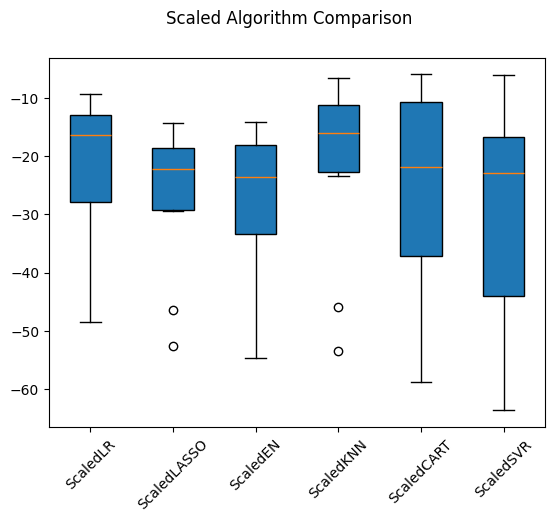

In [19]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results, vert=True, patch_artist=True, labels=names)
ax.set_xticklabels(names, rotation=45) 
plt.show()

### *Evaluate: (Đánh giá)*

Sau khi chuẩn hóa dữ liệu và chạy lại mô hình thì kết quả được đánh gái công bằng và chính xác hơn, dữ liệu không bị data leakage

## 8. Improve Results With Tuning (Cải thiện kết quả bằng cách tinh chỉnh (siêu tham số))

### *Note*

### Định nghĩa
- **Tuning (tinh chỉnh siêu tham số)** là quá trình điều chỉnh các **siêu tham số (hyperparameters)** của mô hình học máy để tìm ra cấu hình tối ưu, từ đó cải thiện hiệu suất dự đoán.  
- **Siêu tham số** khác với **tham số**:
  - **Tham số (parameters):** được mô hình học từ dữ liệu (ví dụ: trọng số `w`, hệ số hồi quy).  
  - **Siêu tham số (hyperparameters):** do con người thiết lập trước khi huấn luyện, quyết định cách mô hình học (ví dụ: số láng giềng `k` trong KNN, số cây trong Random Forest).  

**Lưu ý:** Dữ liệu cần được **chuẩn hóa trước**, sau đó mới tiến hành **tinh chỉnh siêu tham số** để đảm bảo kết quả chính xác.

### Phương pháp tinh chỉnh phổ biến
- **Grid Search:** Thử toàn bộ các tổ hợp siêu tham số trong một lưới định trước.  
- **Random Search:** Chọn ngẫu nhiên một số tổ hợp để tiết kiệm thời gian.  
- **Bayesian Optimization / HyperOpt / Optuna:** Tìm kiếm thông minh dựa trên mô hình xác suất để rút ngắn thời gian tìm kiếm.  

### Ví dụ (KNN)
- Mặc định `KNN` sử dụng `n_neighbors = 7`.  
- Để cải thiện, ta có thể thử nhiều giá trị `k` khác nhau (1, 3, 5, …, 21).  
- Mỗi giá trị `k` được đánh giá bằng **Cross Validation** trên tập huấn luyện đã chuẩn hóa.  
- Kết quả: Chọn giá trị `k` nào cho **điểm trung bình cao nhất** thì đó là cấu hình tốt nhất.  

### Các mô hình thường được tinh chỉnh nhiều
- **KNN (K-Nearest Neighbors):** `n_neighbors`, `weights`, `metric`.  
- **Decision Tree:** `max_depth`, `min_samples_split`, `min_samples_leaf`.  
- **Random Forest:** `n_estimators`, `max_features`, `max_depth`.  
- **SVM (Support Vector Machine):** `C`, `gamma`, `kernel`.  
- **Logistic Regression:** `C`, `penalty`.  
- **Gradient Boosting (XGBoost, LightGBM, CatBoost):** `n_estimators`, `learning_rate`, `max_depth`.  
- **Neural Network (MLP, Deep Learning):** số layer, số neuron, learning rate, batch size.  

### Kết luận
- **Tinh chỉnh siêu tham số** là bước quan trọng để cải thiện mô hình.  
- Không có một cấu hình tốt nhất cho mọi dữ liệu, mà cần thử nghiệm (Grid Search, Random Search, CV).  
- Đây là lý do mà sau bước xây dựng mô hình cơ bản, ta luôn cần **Hyperparameter Tuning** để đạt hiệu suất tối ưu.


In [20]:
# KNN Algorithm tuning (điều chỉnh tham số KNN)
# Chuẩn hóa dữ liệu train (fit theo X_train)
scaler = StandardScaler().fit(X_train)

# Áp dụng transform -> dữ liệu sau chuẩn hóa (mean=0, std=1)
rescaledX = scaler.transform(X_train)

# Tập các giá trị k muốn thử (chỉ số hàng xóm KNN)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])

# Định nghĩa grid search parameter
param_grid = dict(n_neighbors=k_values)

# Khởi tạo model KNN
model = KNeighborsRegressor()

# KFold Cross Validation (chia dữ liệu thành num_folds phần)
kfold = KF(n_splits=num_folds, shuffle=True, random_state=seed)

# GridSearchCV:
# - estimator = model cần tối ưu (KNN)
# - param_grid = danh sách tham số cần thử nghiệm
# - scoring = tiêu chí đánh giá (ví dụ: neg_mean_squared_error)
# - cv = phương pháp cross validation (KFold)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)

# Fit Grid Search -> chạy tất cả các giá trị k trên dữ liệu train
grid_result = grid.fit(rescaledX, Y_train)

In [21]:
# In ra kết quả tốt nhất (score cao nhất và tham số k tốt nhất)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Lấy ra kết quả chi tiết từ GridSearchCV
means = grid_result.cv_results_['mean_test_score']   # Điểm trung bình trên các fold cho từng giá trị k
stds = grid_result.cv_results_['std_test_score']     # Độ lệch chuẩn giữa các fold (độ ổn định của mô hình)
params = grid_result.cv_results_['params']           # Các tham số đã được thử (ở đây là n_neighbors)

# In chi tiết kết quả cho từng k
for mean, stdev, param in zip(means, stds, params):
    # mean: điểm trung bình
    # stdev: độ lệch chuẩn
    # param: tham số (ví dụ {'n_neighbors': 5})
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: -19.497829 using {'n_neighbors': np.int64(1)}
-19.497829 (15.769847) with: {'n_neighbors': np.int64(1)}
-19.977984 (13.803973) with: {'n_neighbors': np.int64(3)}
-21.270967 (14.833544) with: {'n_neighbors': np.int64(5)}
-21.577292 (14.952592) with: {'n_neighbors': np.int64(7)}
-21.001075 (14.701297) with: {'n_neighbors': np.int64(9)}
-21.490306 (14.866957) with: {'n_neighbors': np.int64(11)}
-21.268533 (14.454969) with: {'n_neighbors': np.int64(13)}
-21.968092 (14.209894) with: {'n_neighbors': np.int64(15)}
-22.739880 (14.492752) with: {'n_neighbors': np.int64(17)}
-23.506901 (14.903224) with: {'n_neighbors': np.int64(19)}
-24.240303 (15.156565) with: {'n_neighbors': np.int64(21)}


### *Note*

### Kết quả tinh chỉnh siêu tham số KNN
- Ý nghĩa các cột

    + Best: Điểm số cao nhất (ở đây là -19.497829).

    + mean_test_score: Giá trị trung bình của điểm số (scoring) qua các lần cross-validation.

    + std_test_score: Độ lệch chuẩn – thể hiện mức độ dao động của điểm số.

    + param: Cấu hình siêu tham số (ở đây là n_neighbors).

### *Evaluate: (Đánh giá)*
- Khi `k` tăng lên, điểm số càng giảm (nghĩa là mô hình kém đi)

## 9. Ensemble Methods (Phương pháp tổng hợp)

- Another way that we can improve the performance of algorithms on this problem is by using ensemble methods. In this section we will evaluate four different ensemble machine learning algorithms, two boosting and two bagging methods:

    + **Boosting Methods**: `AdaBoost (AB)` and `Gradient Boosting (GBM)`.

    + **Bagging Methods**: `Random Forests (RF)` and `Extra Trees (ET)`.
    
- We will use the same test harness as before, 10-fold cross validation and pipelines that standardize the training data for each fold.

---
- Một cách khác để cải thiện hiệu suất của các thuật toán trên bài toán này là sử dụng các phương pháp tập hợp (ensemble methods). Trong phần này, chúng ta sẽ đánh giá 4 thuật toán học máy dạng ensemble, gồm:

    + **Boosting Methods**: `AdaBoost (AB)` and `Gradient Boosting (GBM)`.

    + **Bagging Methods**: `Random Forests (RF)` and `Extra Trees (ET)`.

- Chúng ta sẽ sử dụng cùng một cách kiểm thử như trước, đó là 10-fold cross validation và pipeline chuẩn hóa dữ liệu huấn luyện cho từng fold.

---
### *Note*

#### **Ensemble methods**

-   Là kỹ thuật kết hợp nhiều mô hình yếu (weak learners) để tạo thành một mô hình mạnh (strong learner).
-   Giúp tăng độ chính xác và giảm nguy cơ overfitting.

#### **Boosting (AB, GBM)**

-   **Ý tưởng:** học tuần tự, mỗi mô hình mới sẽ cố gắng sửa lỗi của mô hình trước.
-   **AdaBoost (AB):** gán trọng số lớn hơn cho các mẫu khó dự đoán.
-   **Gradient Boosting (GBM):** huấn luyện nhiều cây liên tiếp, mỗi cây học dựa trên sai số (residuals) của cây trước.

#### **Bagging (RF, ET)**

-   **Ý tưởng:** huấn luyện nhiều mô hình song song trên các mẫu bootstrap (chọn ngẫu nhiên có hoàn lại từ tập dữ liệu).
-   **Random Forest (RF):** xây nhiều cây quyết định (decision trees) rồi lấy trung bình kết quả.
-   **Extra Trees (ET):** giống RF nhưng tăng tính ngẫu nhiên khi chọn điểm chia (split), giúp giảm variance.

#### **Đánh giá**

-   **Sử dụng 10-fold cross validation:** dữ liệu được chia làm 10 phần, mô hình huấn luyện trên 9 phần và kiểm thử trên 1 phần, lặp lại 10 lần.
-   **Dùng pipeline chuẩn hóa dữ liệu:** đảm bảo rằng trong mỗi fold, dữ liệu huấn luyện và kiểm thử đều được chuẩn hóa đúng cách, tránh rò rỉ dữ liệu (data leakage).

**Tóm lại:** Đây là bước mở rộng sau tuning KNN, thử nghiệm các mô hình ensemble phổ biến (AB, GBM, RF, ET) để xem có cải thiện kết quả hơn so với mô hình đơn giản (KNN) hay không.

In [22]:
# Tạo danh sách lưu các mô hình ensemble
ensembles = []

# Thêm AdaBoost kết hợp với chuẩn hóa dữ liệu bằng StandardScaler
ensembles.append(('ScaledAB', Pipeline([
    ('Scaler', StandardScaler()),      # Bước 1: chuẩn hóa dữ liệu (mean=0, std=1)
    ('AB', AdaBoostRegressor())        # Bước 2: mô hình AdaBoost Regressor
])))

# Thêm Gradient Boosting kết hợp với chuẩn hóa dữ liệu
ensembles.append(('ScaledGBM', Pipeline([
    ('Scaler', StandardScaler()),
    ('GBM', GradientBoostingRegressor())
])))

# Thêm Random Forest kết hợp với chuẩn hóa dữ liệu
ensembles.append(('ScaledRF', Pipeline([
    ('Scaler', StandardScaler()),
    ('RF', RandomForestRegressor())
])))

# Thêm Extra Trees kết hợp với chuẩn hóa dữ liệu
ensembles.append(('ScaledET', Pipeline([
    ('Scaler', StandardScaler()),
    ('ET', ExtraTreesRegressor())
])))

# Mảng kết quả và tên mô hình
results = []   # Lưu trữ kết quả cross-validation
names = []     # Lưu tên mô hình để hiển thị

# Chạy vòng lặp qua từng mô hình
for name, model in ensembles:
    # Khởi tạo k-fold cross validation
    kfold = KF(n_splits=num_folds, shuffle=True, random_state=seed)
    
    # Thực hiện cross validation với thước đo đánh giá (scoring) đã chọn
    cv_results = cvs(model, X_train, Y_train, cv=kfold, scoring=scoring)
    
    # Lưu kết quả
    results.append(cv_results)
    names.append(name)
    
    # In ra kết quả trung bình và độ lệch chuẩn (std) của cross-validation
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -15.603412 (7.509536)
ScaledGBM: -11.003683 (8.738266)
ScaledRF: -12.703845 (9.891017)
ScaledET: -9.035388 (6.543592)


C:\Users\ratos\AppData\Local\Temp\ipykernel_19144\2758543018.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, vert=True, patch_artist=True, labels=names)


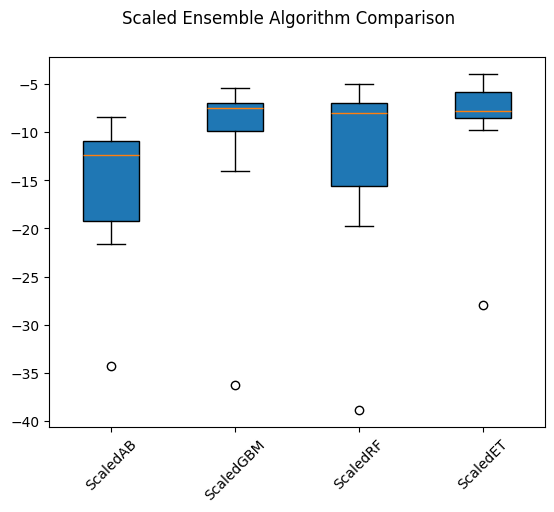

In [23]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results, vert=True, patch_artist=True, labels=names)
ax.set_xticklabels(names, rotation=45) 
plt.show()

## 10. Tune Ensemble Methods (Điều chỉnh (tinh chỉnh) các phương pháp Tổng hợp)

The default number of boosting stages to perform (**n_estimators**) is 100. This is a good candidate parameter of **Gradient Boosting** to tune. Often, the larger the number of boosting stages, the better the performance but the longer the training time. 

In this section we will look at tuning the number of stages for gradient boosting. Below we define a *parameter grid* **n_estimators** values from 50 to 400 in increments of 50. Each setting is **evaluated using 10-fold cross validation**.

---
Mặc định, số lượng vòng lặp boosting cần thực hiện (**n_estimators**) là 100. Đây là một tham số quan trọng của **Gradient Boosting** cần được tinh chỉnh. Thông thường, số vòng boosting càng nhiều thì hiệu suất mô hình càng tốt, nhưng thời gian huấn luyện cũng sẽ dài hơn.

Trong phần này, chúng ta sẽ xem xét việc tinh chỉnh số vòng boosting cho Gradient Boosting. Dưới đây, chúng ta định nghĩa một *lưới tham số (parameter grid)* với các giá trị **n_estimators** từ 50 đến 400, tăng dần mỗi lần 50. Mỗi cấu hình sẽ được đánh giá bằng phương pháp **cross validation 10 lần gấp (10-fold cross validation)**.

In [24]:
# Tune scaled GBM (Gradient Boosting Machine)
# Mục tiêu: tinh chỉnh tham số n_estimators của Gradient Boosting bằng GridSearchCV

# Chuẩn hóa dữ liệu huấn luyện bằng StandardScaler (đưa dữ liệu về phân phối chuẩn: mean=0, std=1)
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# Định nghĩa tập tham số cần thử nghiệm cho n_estimators (số vòng boosting)
# Các giá trị: 50, 100, 150, ..., 400
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))

# Khởi tạo mô hình Gradient Boosting Regressor
# random_state=seed giúp kết quả tái lập được (reproducible)
model = GradientBoostingRegressor(random_state=seed)

# Cấu hình K-Fold Cross Validation
# num_folds = số lần chia dữ liệu (ví dụ 10-fold CV)
kfold = KF(n_splits=num_folds, shuffle=True, random_state=seed)

# Khởi tạo GridSearchCV:
# - estimator: mô hình Gradient Boosting
# - param_grid: tập giá trị n_estimators cần thử
# - scoring: tiêu chí đánh giá (ví dụ: 'neg_mean_squared_error' hoặc R^2)
# - cv: phương pháp cross-validation (ở đây dùng KFold)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)

# Tiến hành huấn luyện và tìm tham số tối ưu từ param_grid trên dữ liệu đã chuẩn hóa
grid_result = grid.fit(rescaledX, Y_train)

### *Evaluate: (Đánh giá)*

- Đoạn code này dùng **GridSearchCV** để tìm giá trị *n_estimators (số vòng boosting)* tốt nhất cho **Gradient Boosting Regressor**, dựa trên dữ liệu đã được chuẩn hóa và đánh giá bằng **K-Fold Cross Validation**.

In [25]:
# In ra kết quả tham số tốt nhất sau khi GridSearchCV hoàn tất
# best_score_ : điểm số đánh giá (scoring) cao nhất đạt được
# best_params_ : bộ tham số tương ứng với điểm số cao nhất
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Lấy ra kết quả chi tiết từ cross-validation
# mean_test_score: điểm trung bình (trên các fold) cho mỗi cấu hình tham số
# std_test_score: độ lệch chuẩn (mức độ dao động giữa các fold)
# params: danh sách tham số được thử nghiệm
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

# Duyệt qua từng bộ tham số để in kết quả
# mean: điểm trung bình
# stdev: độ lệch chuẩn
# param: bộ tham số đang xét
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: -10.560638 using {'n_estimators': np.int64(400)}
-11.629999 (8.833221) with: {'n_estimators': np.int64(50)}
-11.073455 (8.772155) with: {'n_estimators': np.int64(100)}
-10.838924 (8.734377) with: {'n_estimators': np.int64(150)}
-10.785568 (8.657244) with: {'n_estimators': np.int64(200)}
-10.654778 (8.540552) with: {'n_estimators': np.int64(250)}
-10.649385 (8.497232) with: {'n_estimators': np.int64(300)}
-10.589337 (8.413596) with: {'n_estimators': np.int64(350)}
-10.560638 (8.353747) with: {'n_estimators': np.int64(400)}


## 11. Finalize Model

- Sau khi tinh chỉnh tham số xong bằng cross-validation, giờ ta sẽ huấn luyện mô hình cuối cùng (final model) với toàn bộ training set đã chuẩn hóa, rồi đem đánh giá trên validation set

In [26]:
# Chuẩn bị mô hình Gradient Boosting để huấn luyện "final model"

# 1. Chuẩn hóa dữ liệu huấn luyện bằng StandardScaler
#    - fit(X_train): tính toán mean và std của X_train
#    - transform(X_train): áp dụng chuẩn hóa lên dữ liệu huấn luyện
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# 2. Khởi tạo mô hình Gradient Boosting Regressor
#    - random_state=seed: đảm bảo kết quả tái lập
#    - n_estimators=400: số vòng boosting (tham số đã được chọn sau khi tune)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)

# 3. Huấn luyện mô hình với dữ liệu huấn luyện đã chuẩn hóa
model.fit(rescaledX, Y_train)


,loss,'squared_error'
,learning_rate,0.1
,n_estimators,400
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


### **Tóm lại:**
- Đoạn này huấn luyện mô hình Gradient Boosting cuối cùng với tham số tối ưu (n_estimators=400) trên toàn bộ tập training (sau khi chuẩn hóa).

- Quan trọng nhất là `n_estimators=400` (tham số đã tune).

In [27]:
# 1. Chuẩn hóa tập validation bằng cùng scaler đã fit trên training
#    (không fit lại, chỉ transform để đảm bảo cùng thang đo với training)
rescaledValidationX = scaler.transform(X_validation)

# 2. Dùng mô hình đã huấn luyện để dự đoán trên tập validation
predictions = model.predict(rescaledValidationX)

# 3. Đánh giá chất lượng dự đoán bằng Mean Squared Error (MSE)
#    - MSE = trung bình của (giá trị thực - giá trị dự đoán)^2
print(mean_squared_error(Y_validation, predictions))


11.902132586880027


### **Ý nghĩa tổng thể:**

- Đảm bảo dữ liệu validation được chuẩn hóa giống như training.

- Dự đoán kết quả với mô hình Gradient Boosting đã huấn luyện.

- Tính MSE để đánh giá sai số mô hình trên tập validation.

## 12. Summary

In this chapter you worked through a regression predictive modeling machine learning problem from end-to-end using Python. Specifically, the steps covered were:

- Problem Definition (Boston house price data).

- Loading the Dataset.

- Analyze Data (some skewed distributions and correlated attributes).

- Evaluate Algorithms (Linear Regression looked good).

- Evaluate Algorithms with Standardization (KNN looked good).

- Algorithm Tuning (K=3 for KNN was best).

- Ensemble Methods (Bagging and Boosting, Gradient Boosting looked good).

- Tuning Ensemble Methods (getting the most from Gradient Boosting).

- Finalize Model (use all training data and confirm using validation dataset).


Working through this case study showed you how the recipes for specific machine learning tasks can be pulled together into a complete project. Working through this case study is good practice at applied machine learning using Python and scikit-learn.

---
Trong chương này, bạn đã thực hiện một bài toán dự đoán hồi quy (regression predictive modeling) từ đầu đến cuối bằng Python. Cụ thể, các bước đã thực hiện bao gồm:

- Xác định bài toán (dữ liệu giá nhà Boston).

- Nạp dữ liệu.

- Phân tích dữ liệu (nhận thấy một số phân phối bị lệch và các thuộc tính có tương quan).

- Đánh giá các thuật toán (Linear Regression cho kết quả tốt).

- Đánh giá thuật toán với dữ liệu chuẩn hóa (KNN cho kết quả tốt).

- Tinh chỉnh thuật toán (K=3 cho KNN là tốt nhất).

- Phương pháp Ensemble (Bagging và Boosting, Gradient Boosting cho kết quả tốt).

- Tinh chỉnh Ensemble Methods (tối ưu Gradient Boosting).

- Hoàn thiện mô hình (huấn luyện trên toàn bộ training set và xác nhận bằng validation dataset).

Việc thực hành thông qua case study này đã cho thấy cách kết hợp các “công thức” (recipes) cho từng nhiệm vụ máy học riêng lẻ thành một dự án hoàn chỉnh. Đây là một bài tập rất tốt để rèn luyện kỹ năng áp dụng machine learning bằng Python và scikit-learn.

# KẾT THÚC